## 09 [NLP 입문] -NLP Basics
### 09-01 Tokenization
#### 1. Word Tokenization

In [ ]:
# 토큰화 중 생기는 선택의 순간
# Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop.
# Don't , Jone's 토큰화 하는 방법 다양


from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import nltk

nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/solkim/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# word_tokenize
print(
    "단어 토큰화1 :",
    word_tokenize(
        "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."
    ),
)
#'Do', "n't", 'Jone', "'s",

단어 토큰화1 : ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [ ]:
print(
    "단어 토큰화2 :",
    WordPunctTokenizer().tokenize(
        "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."
    ),
)
#'Don', "'", 't','Jone', "'", 's'

단어 토큰화2 : ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [ ]:
print(
    "단어 토큰화3 :",
    text_to_word_sequence(
        "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."
    ),
)
# "don't", "jone's"

단어 토큰화3 : ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


### 토큰화에서 고려해야할 사항
1. 구두점, 특수문자 단순 제외해서는 안됨
    1. 마침표(.)도 문장의 경계를 알 수 있음
    2. 단어 자체에 구두점 있는 경우도 있음 Ph.D, $45.55
2. 줄임말
    1. we're -> re는 접어(clitic)
3. 단어 내에 띄어쓰기가 있는 경우
    1. New York 하나의 단어
    2. rock 'n' roll
4. 표준 토큰화 예제(Penn Treebank Tokenization)
    1. 하이푼으로 구성된 단어는 하나로 유지
    2. doesn't 와 같이 아포스트로피로 '접어'가 함꼐하는 단어는 분리해준다

In [ ]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print("트리뱅크 워드토크나이저 :", tokenizer.tokenize(text))

트리뱅크 워드토크나이저 : ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


### 문장 토큰화(Sentence Tokenization)
1. Corpus 내에서 sentence 단위로 구분하는 작업
2. Sentence segmentation 이라고도 함
3. 마침표(.)는 문장 중간에 들어가는 경우 많다. ex) aaa@gmail.com으로 결과보내줘

In [ ]:
from nltk.tokenize import sent_tokenize

text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print("문장 토큰화1 :", sent_tokenize(text))

문장 토큰화1 : ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


In [ ]:
text = "I am actively looking for Ph.D. students. and you are a Ph.D student."
print("문장 토큰화2 :", sent_tokenize(text))

문장 토큰화2 : ['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


In [ ]:
!pip install kss

In [ ]:
# KSS(Korean Sentence Splitter)
import kss

text = "딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?"
print("한국어 문장 토큰화 :", kss.split_sentences(text))

### 한국어 토큰화의 어려움
1. 영어는 New York 같은 합성어, he's 같은 줄임말 정도만 예외 처리후 띄어쓰기 기준으로 토큰화해도 단어 토큰화 잘 됨
2. 한국어에서 띄어쓰기 단위는 '어절' 어절은 단어와 같지 않다.
3. 한국어는 교착어다
4. 교착어는 조사,어미를 붙여서 쓰는 말이다.

### 한국어(교착어) 특성
1. 그 라는 단어에 그가, 그에게, 그를, 그와 등등 다양한 조사가 붙는다.
2. 같은 단어인데 다른 조사가 붙어서 다른 단어로 인식이 된다.
3. 형태소(morpheme) : 뜻을 가진 가장 작은 말의 단위
    1. 자립 형태소 : 그 자체로 단어가 되는 형태소 
        - 체언(명사,대명사,수사), 수식언(관형사,부사), 감탄사
    2. 의존 형태소 : 다른 형태소와 결합하여 사용되는 형태소
        - 접사, 어미, 조사, 어간
4. 영어보다 띄어쓰기가 잘 지켜지지 않는다.
    - 띄어쓰기를 재대로 하지 않아도 이해가 되는 경우가 많기 때문
    - Tobeornottobethaisthequestion
    - 제가이렇게띄어씍를전혀하지않고글을썻다고하더라도글을이해할수있습니다.
5. 품사 태깅(Part-of-speech tagging)
    - fly : 동사로는 '날다', 명사로는'파리'
    - 못 : 부사로는 '할수없다', 명사로는 '망치등을 사용해 목재 따위를 고정하는 물건'
    - 단어 토큰화 과정에서 각 단어가 어떤 품사로 쓰였는지를 구분해 놓기도 함

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

nltk.download("averaged_perceptron_tagger_eng")
text = "I am actively looking for Ph.D. students. and you are a Ph.D. student."
tokenized_sentence = word_tokenize(text)

print("단어 토큰화 :", tokenized_sentence)
print("품사 태깅 :", pos_tag(tokenized_sentence))

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/solkim/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


단어 토큰화 : ['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']
품사 태깅 : [('I', 'PRP'), ('am', 'VBP'), ('actively', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('Ph.D.', 'NNP'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.D.', 'NNP'), ('student', 'NN'), ('.', '.')]


In [18]:
from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

print("OKT 형태소 분석 :", okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print("OKT 품사 태깅 :", okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print("OKT 명사 추출 :", okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

OKT 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 : [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 : ['코딩', '당신', '연휴', '여행']


In [ ]:
print("꼬꼬마 형태소 분석 :", kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print("꼬꼬마 품사 태깅 :", kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print("꼬꼬마 명사 추출 :", kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

꼬꼬마 형태소 분석 : ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
꼬꼬마 품사 태깅 : [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]
꼬꼬마 명사 추출 : ['코딩', '당신', '연휴', '여행']


### 09-02 텍스트 데이터의 정제와 정규화
1. 토큰화 작업 전, 후에는 텍스트 데이터를 정제(cleaning), 정규화(normalization) 함께 해야함.
- cleaning : 갖고 있는 코퍼스로부터 노이즈 데이터 제거
- normalization : 표현 방법이 다른 단어들을 통합시켜 같은 단어로 만들어줌

2. 규칙에 기반한 표기가 다른 단어 통합
- USA, US
- uh-huh, uhhuh

3. 대, 소문자 통합
- 모두 소문자로 통합하면 문제 생김
    - US(미국), us(우리)
    - General Motors, Bush 회사이름, 사람이름은 대문자 유지
- 문장의 첫 단어의 대문자만 소문자로 바꾸는 방법
- 훈련에 사용하는 Corpus가 대,소문자 규칙에 어긋나게 썼다면 그냥 소문자로 다 통합하는게 좋을때도 있음

4. 불필요한 단어 제거
    1. 등장 빈도가 적은 단어
    2. 길이가 짧은 단어
        - 영어에서 효과적이라고 알려짐
        - 한국어 단어는 영어보다 평균적으로 짧음

5. 정규 표현식
- 규칙기반으로 cleaning

In [ ]:
import re

text = "I was wondering if anyone out there could enlighten me on this car."

# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r"\W*\b\w{1,2}\b")
print(shortword.sub("", text))

 was wondering anyone out there could enlighten this car.


### 09-03 Stopwords
1. 자주 등장하지만 분석에 큰 도움이 되지 않는 단어
    - I,my,me,over,조사,접미사

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from konlpy.tag import Okt

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/solkim/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# NLTK에서 불용어 확인하기 (Natural Language Toolkit)
stop_words_list = stopwords.words("english")
print("불용어 개수 :", len(stop_words_list))
print("불용어 10개 출력 :", stop_words_list[:10])

불용어 개수 : 198
불용어 10개 출력 : ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']


In [ ]:
# NLTK를 통해서 불용어 제거하기
example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words("english"))
word_tokens = word_tokenize(example)

result = []
for word in word_tokens:
    if word not in stop_words:
        result.append(word)

print("불용어 제거 전 :", word_tokens)
print("불용어 제거 후 :", result)

불용어 제거 전 : ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
불용어 제거 후 : ['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


In [ ]:
okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(" "))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print("불용어 제거 전 :", word_tokens)
print("불용어 제거 후 :", result)

불용어 제거 전 : ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지', '.']
불용어 제거 후 : ['고기', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨대', '삼겹살', '을', '중요한', '있지', '.']


### 정규 표현식


In [ ]:
import re

# 1. . 기호
# 한개의 임의의 문자를 나타냄 a.c 는 abc, azc, adc , a!c와 같은 형태는 매치
r = re.compile("a.c")
print(r.search("kkk"))
print(r.search("abc"))

None
<re.Match object; span=(0, 3), match='abc'>


In [32]:
# 2. ? 기호
# ?앞의 문자가 존재할수도 존재하지 않을수도 있음을 나타냄
# ab?c -> abc, ac 둘다 매치
r = re.compile("ab?c")
print(r.search("abbc"))
print(r.search("abc"))
print(r.search("ac"))

None
<re.Match object; span=(0, 3), match='abc'>
<re.Match object; span=(0, 2), match='ac'>


In [33]:
# 3. *기호
# *바로앞의 문자가 0개 이상일 경우를 나타냄
# 존재하지 않을수도 있고 또는 여러개일수도 있음
# ab*c -> ac, abc, abbc, abbbc

r = re.compile("ab*c")
print(r.search("a"))
print(r.search("ac"))
print(r.search("abc"))
print(r.search("abbbbbbbc"))

None
<re.Match object; span=(0, 2), match='ac'>
<re.Match object; span=(0, 3), match='abc'>
<re.Match object; span=(0, 9), match='abbbbbbbc'>


In [34]:
# 4. +기호
# *와 유사하나 최소 1개이상

r = re.compile("ab+c")
print(r.search("ac"))
print(r.search("abbbbbbbc"))

None
<re.Match object; span=(0, 9), match='abbbbbbbc'>


In [ ]:
# 5. ^기호
# 시작되는 문자열 지정
# ^ab -> ab로 시작하는 문자열 매칭

r = re.compile("^ab")
print(r.search("bbc"))
print(r.search("abccsad"))

None
<re.Match object; span=(0, 2), match='ab'>


In [ ]:
# 6. {숫자} 기호
# 문자에 {숫자}를 붙이면 해당 문자를 숫자만큼 반복한 것을 나타냄
# ab{2}c 라면 a와 c사이에 b가 존재하면서 b가 2개

r = re.compile("ab{2}c")
print(r.search("ac"))
print(r.search("abbc"))

None
<re.Match object; span=(0, 4), match='abbc'>


In [37]:
# 7. {숫자1, 숫자2}기호
# 문자에 해당 기호를 붙이면 해당 문자를 숫자1이상~숫자2이하만큼 반복

r = re.compile("ab{2,8}c")
print(r.search("ac"))
print(r.search("abbc"))
print(r.search("abbbbbbbbc"))

None
<re.Match object; span=(0, 4), match='abbc'>
<re.Match object; span=(0, 10), match='abbbbbbbbc'>


In [38]:
# 8. {숫자, } 기호
# 문자에 해당 기호를 붙이면 해당 문자를 숫자 이상만큼 반복

r = re.compile("ab{2,}c")
print(r.search("abc"))
print(r.search("abbc"))
print(r.search("abbbbbbbbbbbc"))

None
<re.Match object; span=(0, 4), match='abbc'>
<re.Match object; span=(0, 13), match='abbbbbbbbbbbc'>


In [39]:
# 9. []기호
# []안에 문자들을 넣으면 그 문자들 중 한개의 문자와 매치
# [abc] a or b or c가 들어가있는 문자열과 매치
# 범위 지정도 가능 [a-zA-Z]는 알파벳 전부
# [0-9]는 숫자 전부

r = re.compile("[abc]")
print(r.search("zzz"))
print(r.search("a"))
print(r.search("aaaaaaa"))
print(r.search("bcabca"))

None
<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='b'>


In [40]:
r = re.compile("[a-z]")
print(r.search("AAA"))
print(r.search("111"))
print(r.search("asuFD"))

None
None
<re.Match object; span=(0, 1), match='a'>


In [42]:
# 10. [^문자] 기호
# ^기호 뒤에 붙은 문자들을 제외한 모든 문자를 매치
# [^abc] a or b or c가 들어간 문자열을 제외한 모든 문자열 매치

r = re.compile("[^abc]")
print(r.search("a"))
print(r.search("ab"))
print(r.search("b"))
print(r.search("d"))
print(r.search("1"))

None
None
None
<re.Match object; span=(0, 1), match='d'>
<re.Match object; span=(0, 1), match='1'>


In [43]:
# 정규 표현식 모듈 함수 예제
# re.match() 와 re.search()의 차이
# search 는 문자열 전체에서 정규표현식과 매치하는지 봄
# match 는 문자열 첫 부분부터 매치하는지 확인, 시작 부분이 매치하지 않으면 찾지 않음

r = re.compile("ab.")
print(r.match("kkkabc"))
print(r.search("kkkabc"))

None
<re.Match object; span=(3, 6), match='abc'>


In [44]:
# re.split()
# 정규표현식을 기준으로 문자열들을 분리하려 리스트로 리턴
# 공백 기준 분리
text = "사과 딸기 수박 메론 바나나"
re.split(" ", text)

['사과', '딸기', '수박', '메론', '바나나']

In [45]:
# 줄바꿈 기준 분리
text = """사과
딸기
수박
메론
바나나"""

re.split("\n", text)

['사과', '딸기', '수박', '메론', '바나나']

In [ ]:
# '+'를 기준으로 분리
text = "사괴+딸기+수박+메론+바나나"
re.split("\+", text)

['사괴', '딸기', '수박', '메론', '바나나']

In [ ]:
# re.findall()
# findall()함수는 정규 표현식과 매치되는 모든 문자열들을 리스트로 리턴
# 매치되는 문자열 없으면 빈 리스트 리턴

text = """이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""

print(re.findall("\d+", text))  # 전체 텍스트에서 숫자만 찾아서 리턴
print(re.findall("\d+", "문자열입니다."))

['010', '1234', '1234', '30']
[]


In [ ]:
# re.sub()
# 정규표현식 패턴과 일치하는 문자열 찾아 다른 문자열로 대체
text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."

preprocessed_text = re.sub("[^a-zA-Z]", " ", text)  # 영어알파벳이 아닌것을 공백으로
print(preprocessed_text)

Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern 


In [ ]:
text = """100 John    PROF
101 James   STUD
102 Mac   STUD"""

print(re.split("\s+", text))  # 공백을 찾아내는 정규표현식
print(re.findall("\d+", text))  # 숫자 최소 한개
print(
    re.findall("[A-Z]", text)
)  # 대문자 찾기, 문자열을 가져오는게 아니라 대문자 각각을 가져옴
print(re.findall("[A-Z]{4}", text))  # 대문자가 연속 4개이상 등장하는 경우
print(re.findall("[A-Z][a-z]+", text))  # 처음에는 대문자 그 뒤에 소문자 여러개

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']
['100', '101', '102']
['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']
['PROF', 'STUD', 'STUD']
['John', 'James', 'Mac']


In [ ]:
from nltk.tokenize import RegexpTokenizer

text = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"

tokenizer1 = RegexpTokenizer("[\w]+")  # 문자 또는 숫자가 1개이상인경우
tokenizer2 = RegexpTokenizer("\s+", gaps=True)  # 공백기준

print(tokenizer1.tokenize(text))
print(tokenizer2.tokenize(text))

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


In [ ]:
# 자연어처리 토큰화 -> 단어 집합 생성 -> 정수 인코딩 -> 패딩 -> 벡터화
en_text = "A Dog Run back corner near spare bedrooms"
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy # 토큰화 라이브러리
spacy_en = spacy.load('en_core_web_sm')

print(spacy_en.tokenizer(en_text))

In [3]:
def tokenize(en_text):
    return [tok.text for tok in spacy_en.tokenizer(en_text)]

In [6]:
print(tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


In [8]:
!pip install nltk

import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
print(word_tokenize(en_text))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/solkim/nltk_data...


['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [9]:
# 띄어쓰기로 토큰화
print(en_text.split())

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


In [10]:
# 한국어 띄어쓰기 토큰화
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


In [ ]:
# 형태소 토큰화
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [ ]:
from konlpy.tag import Mecab

tokenizer = Mecab()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


In [ ]:
# 문자 토큰화
print(list(en_text))

['A', ' ', 'D', 'o', 'g', ' ', 'R', 'u', 'n', ' ', 'b', 'a', 'c', 'k', ' ', 'c', 'o', 'r', 'n', 'e', 'r', ' ', 'n', 'e', 'a', 'r', ' ', 's', 'p', 'a', 'r', 'e', ' ', 'b', 'e', 'd', 'r', 'o', 'o', 'm', 's']


In [ ]:
# 단어 집합 생성
# 중복을 제거한 텍스트의 총 단어의 집합
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt",
    filename="ratings.txt",
)
data = pd.read_table("ratings.txt")  # 데이터프레임에 저장
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [ ]:
print(f"전체 샘플의 수 : {len(data)}")

전체 샘플의 수 : 200000


In [ ]:
sample_data = data[:100]  # 임의로 100개만 저장

In [ ]:
# 정규표현식으로 데이터 정제
sample_data["document"] = sample_data["document"].str.replace(
    "[^ㄱ-하-ㅣ가-힣]", "", regex=True
)
# 한글과 공백을 제외하고 모두 제거
sample_data[:10]

/var/folders/rw/lh2cbhl94cd4db2dsg3x2blh0000gn/T/ipykernel_62261/172372675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-하-ㅣ가-힣]", "", regex=True)


,id,document,label
0,8112052,어릴때보고지금다시봐도재밌어요ㅋㅋ,1
1,8132799,디자인을배우는학생으로외국디자이너와그들이일군전통을통해발전해가는문화산업이부러웠는데사실우...,1
2,4655635,폴리스스토리시리즈는부터뉴까지버릴께하나도없음최고,1
3,9251303,와연기가진짜개쩔구나지루할거라고생각했는데몰입해서봤다그래이런게진짜영화지,1
4,10067386,안개자욱한밤하늘에떠있는초승달같은영화,1
5,2190435,사랑을해본사람이라면처음부터끝까지웃을수있는영화,1
6,9279041,완전감동입니다다시봐도감동,1
7,7865729,개들의전쟁나오나요나오면빠로보고싶음,1
8,7477618,굿,1
9,9250537,바보가아니라병쉰인듯,1


In [ ]:
# 불용어 정의
stopwords = [
    "의",
    "가",
    "이",
    "은",
    "들",
    "는",
    "좀",
    "잘",
    "걍",
    "과",
    "도",
    "를",
    "으로",
    "자",
    "에",
    "와",
    "한",
    "하다",
]

In [ ]:
tokenizer = Mecab()
tokenized = []
for sentence in sample_data["document"]:
    temp = tokenizer.morphs(sentence)  # 토큰화
    temp = [word for word in temp if not word in stopwords]  # 불용어 제거
    tokenized.append(temp)

In [23]:
print(tokenized[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다'], ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'], ['연기', '진짜', '개', '쩔', '구나', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'], ['사랑', '을', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]


In [ ]:
vocab = FreqDist(np.hstack(tokenized))  # 단어 빈도 계산
print(f"단어 집합의 크기 : {len(vocab)}")

단어 집합의 크기 : 656


In [ ]:
vocab["재밌"]  # 단어를 key, 빈도수를 value로

8

In [27]:
vocab

[(np.str_('다'), 42),
 (np.str_('영화'), 31),
 (np.str_('고'), 27),
 (np.str_('을'), 24),
 (np.str_('하'), 22),
 (np.str_('있'), 18),
 (np.str_('게'), 15),
 (np.str_('보'), 14),
 (np.str_('최고'), 13),
 (np.str_('좋'), 13),
 (np.str_('는데'), 12),
 (np.str_('없'), 12),
 (np.str_('같'), 10),
 (np.str_('수'), 10),
 (np.str_('봤'), 10),
 (np.str_('적'), 10),
 (np.str_('었'), 10),
 (np.str_('할'), 9),
 (np.str_('만'), 9),
 (np.str_('정말'), 9),
 (np.str_('재밌'), 8),
 (np.str_('해'), 8),
 (np.str_('였'), 8),
 (np.str_('때'), 7),
 (np.str_('어요'), 7),
 (np.str_('에서'), 7),
 (np.str_('까지'), 7),
 (np.str_('음'), 7),
 (np.str_('진짜'), 7),
 (np.str_('했'), 7),
 (np.str_('지'), 7),
 (np.str_('본'), 7),
 (np.str_('감동'), 7),
 (np.str_('로'), 7),
 (np.str_('내'), 7),
 (np.str_('네요'), 7),
 (np.str_('다시'), 6),
 (np.str_('사람'), 6),
 (np.str_('것'), 6),
 (np.str_('생각'), 6),
 (np.str_('싶'), 6),
 (np.str_('나'), 6),
 (np.str_('아'), 6),
 (np.str_('너무'), 6),
 (np.str_('으면'), 6),
 (np.str_('지금'), 5),
 (np.str_('그'), 5),
 (np.str_('사실'), 5),
 (np.

In [ ]:
vocab_size = 500
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print(f"단어 집합의 크기 : {len(vocab)}")

단어 집합의 크기 : 500


In [ ]:
# 각 단어에 고유한 정수 부여
word_to_index = {word[0]: index + 2 for index, word in enumerate(vocab)}
word_to_index["pad"] = 1
word_to_index["unk"] = 0

In [30]:
# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded = []
for line in tokenized: # 입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: # 각 줄에서 1개씩 글자를 읽음
        try:
            temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
        except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체
            temp.append(word_to_index['unk']) # unk의 인덱스로 변환
    encoded.append(temp)

In [31]:
print(encoded[:10])

[[78, 25, 9, 4, 47, 38, 79, 22, 26, 80], [185, 5, 81, 186, 187, 188, 48, 189, 113, 5, 190, 191, 23, 114, 192, 193, 12, 49, 82, 115, 27, 48, 194, 116, 117, 28, 195, 5, 196, 197, 14, 113, 7, 63, 50, 14, 39, 198, 5, 199, 4, 200, 15, 7, 83, 40, 201, 84], [202, 118, 203, 51, 204, 28, 205, 206, 52, 13, 29, 10], [53, 30, 119, 207, 208, 209, 210, 64, 41, 31, 12, 211, 120, 16, 2, 212, 65, 8, 30, 3, 32], [213, 214, 215, 216, 7, 217, 14, 3], [121, 5, 23, 33, 39, 122, 123, 51, 117, 28, 85, 5, 15, 7, 3], [124, 34, 218, 38, 79, 34], [119, 219, 54, 220, 54, 86, 221, 35, 9, 4, 42, 29], [55], [222, 87, 88, 223, 224, 56, 89]]


리뷰의 최대 길이 : 62
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 13.510000


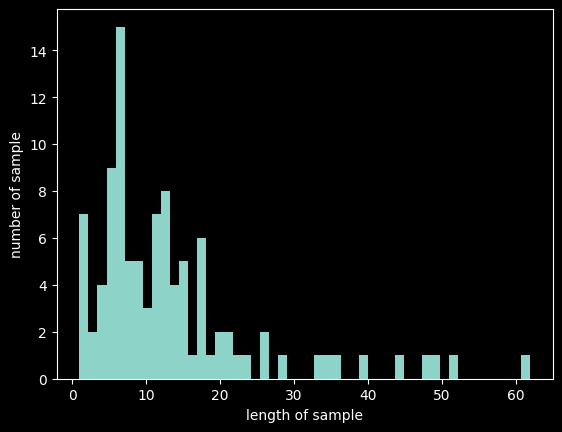

In [32]:
# 길이가 다른 문장들을 모두 동일한 길이로 바꿔주는 패딩(padding)
# 길이가 정해준 길이보다 짧은 샘플들에 'pad'토큰 추가해서 길이 맞춰줌

max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' %max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [33]:
# 모든 리뷰 길이 62로 통일
for line in encoded:
    if len(line) < max_len:
        line += [word_to_index['pad']] * (max_len - len(line))

In [34]:
print('리뷰의 최대 길이 : %d' %max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 62
리뷰의 최소 길이 : 62
리뷰의 평균 길이 : 62.000000


In [35]:
print(encoded[:3])

[[78, 25, 9, 4, 47, 38, 79, 22, 26, 80, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [185, 5, 81, 186, 187, 188, 48, 189, 113, 5, 190, 191, 23, 114, 192, 193, 12, 49, 82, 115, 27, 48, 194, 116, 117, 28, 195, 5, 196, 197, 14, 113, 7, 63, 50, 14, 39, 198, 5, 199, 4, 200, 15, 7, 83, 40, 201, 84, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [202, 118, 203, 51, 204, 28, 205, 206, 52, 13, 29, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
